In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import re
import string
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import re

# define regex pattern for chat line
pattern = r'^(\d{2}\/\d{2}\/\d{4}),\s(\d{2}:\d{2})\s-\s(.*?):\s(.*)$'

# create empty dataframe
df = pd.DataFrame(columns=["date", "time", "user", "message"])

# read file line by line
with open("HQ.txt", encoding='utf-8') as f:
    for line in f:
        # match regex pattern with line
        match = re.match(pattern, line)
        if match:
            # extract groups from match
            groups = match.groups()
            # add row to dataframe
            df = df.append({"date": groups[0], "time": groups[1], "user": groups[2], "message": groups[3]}, ignore_index=True)

# print dataframe
df

,date,time,user,message
0,19/01/2022,13:00,Ngabi,You want a long distance silent disco with ur ...
1,19/01/2022,13:00,Ngabi,Danny is ur power disturbing sir ?
2,19/01/2022,13:01,Ambro,Hehehe
3,19/01/2022,13:01,Ambro,Bambi
4,19/01/2022,13:02,Ngabi,Man ffe ka power level Kali on de low
...,...,...,...,...
39967,01/03/2023,14:08,Ambro,Actually kempten will officially be opened for...
39968,01/03/2023,14:08,Ambro,For now let is just eat
39969,01/03/2023,14:10,Ambro,<Media omitted>
39970,01/03/2023,14:14,Daniel Charles,Btw leave me


In [3]:
# convert date column to datetime data type
df['date'] = pd.to_datetime(df['date'])

# extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,date,time,user,message,year,month
0,2022-01-19,13:00,Ngabi,You want a long distance silent disco with ur ...,2022,1
1,2022-01-19,13:00,Ngabi,Danny is ur power disturbing sir ?,2022,1
2,2022-01-19,13:01,Ambro,Hehehe,2022,1
3,2022-01-19,13:01,Ambro,Bambi,2022,1
4,2022-01-19,13:02,Ngabi,Man ffe ka power level Kali on de low,2022,1
...,...,...,...,...,...,...
39967,2023-01-03,14:08,Ambro,Actually kempten will officially be opened for...,2023,1
39968,2023-01-03,14:08,Ambro,For now let is just eat,2023,1
39969,2023-01-03,14:10,Ambro,<Media omitted>,2023,1
39970,2023-01-03,14:14,Daniel Charles,Btw leave me,2023,1


In [4]:
df['user'].unique()

array(['Ngabi', 'Ambro', 'Saga', 'Inno Samurai', 'Dannie3', 'Pato',
       'Oma Mtn', 'Sh@eks', 'Emmaa', 'Daniel Charles'], dtype=object)

In [5]:
df['user'] = df['user'].replace({'Daniel Charles':'D C','Ngabi': 'N B', 'Ambro': 'O A','Saga': 'Sa Ga','Inno Samurai': 'E I P','Pato': 'R P','Oma Mtn': 'O J','Emmaa': 'E E'})

In [6]:
df['user'].unique()

array(['N B', 'O A', 'Sa Ga', 'E I P', 'Dannie3', 'R P', 'O J', 'Sh@eks',
       'E E', 'D C'], dtype=object)

# Exploratory Data Analysis

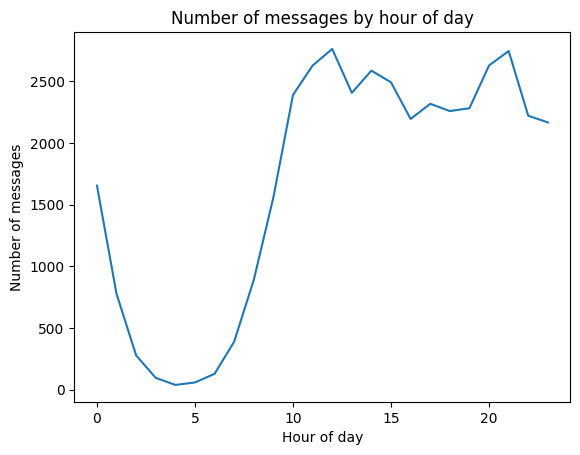

In [7]:
# extract hour from time column
df['hour'] = pd.to_datetime(df['time']).dt.hour

# group by hour and count number of messages
hourly_counts = df.groupby('hour')['message'].count()

# plot results
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Number of messages by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Number of messages')
plt.show()

# Most Active Users

<Axes: >

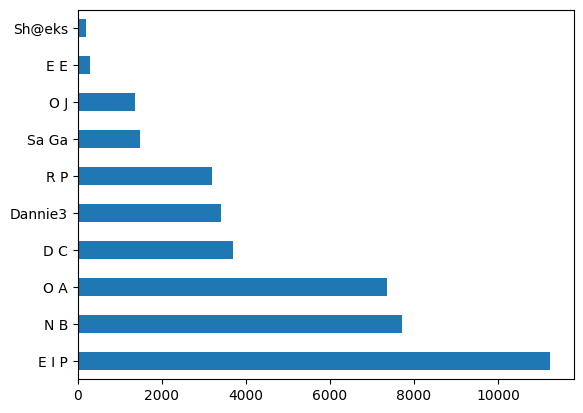

In [8]:
df['user'].value_counts().plot(kind = 'barh')

# Most common words

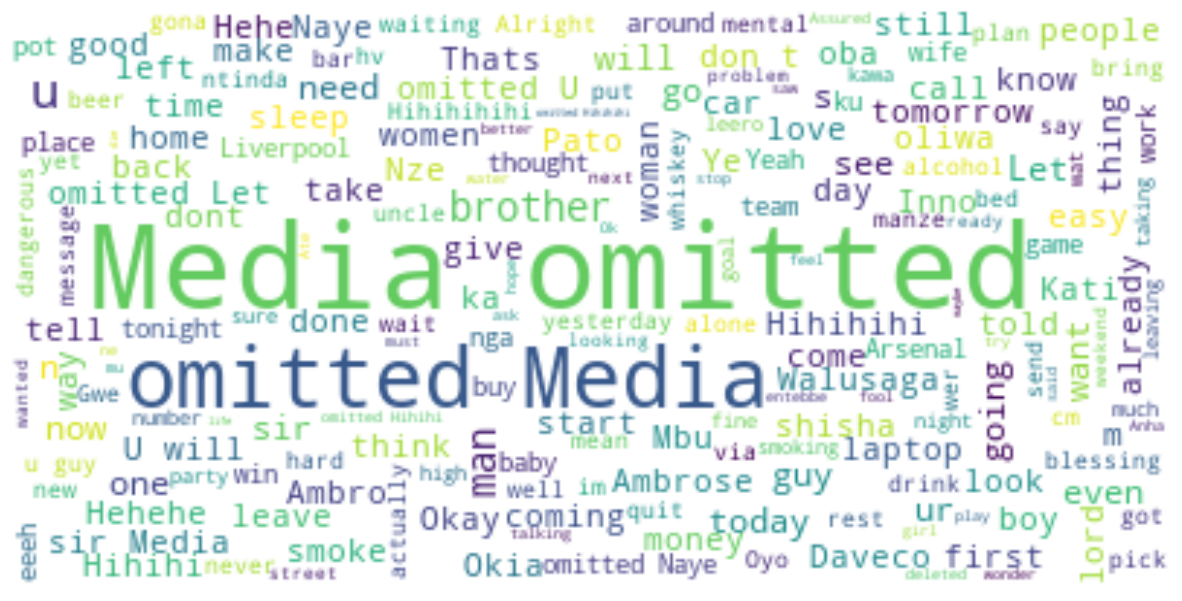

In [9]:
text = " ".join(i for i in df['message'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
#downloading vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [13]:
sentiment_analyzer.polarity_scores('Somehow I wish that were true 😂')

{'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'compound': 0.6705}

In [14]:
df.iloc[0]['message']

'You want a long distance silent disco with ur baby, join Spotify and create a group and invite ur baby. Thanks me later'

In [15]:
sentiment_analyzer.polarity_scores(df.iloc[0]['message'])

{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.7964}

In [16]:
df['Scores'] = df['message'].apply(lambda message: sentiment_analyzer.polarity_scores(message))

In [17]:
df['compound'] = df['Scores'].apply(lambda d: d['compound'])

In [18]:
df['Sentiment'] = df['compound'].apply(lambda score: 'Positive' if score > 0 else ('Neutral' if score == 0 else 'Negative'))

In [19]:
df.head()

,date,time,user,message,year,month,hour,Scores,compound,Sentiment
0,2022-01-19,13:00,N B,You want a long distance silent disco with ur ...,2022,1,13,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.7964,Positive
1,2022-01-19,13:00,N B,Danny is ur power disturbing sir ?,2022,1,13,"{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'comp...",-0.5106,Negative
2,2022-01-19,13:01,O A,Hehehe,2022,1,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,2022-01-19,13:01,O A,Bambi,2022,1,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,2022-01-19,13:02,N B,Man ffe ka power level Kali on de low,2022,1,13,"{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'comp...",-0.2732,Negative


In [20]:
df = df.rename(columns={'compound': 'Score'})
df = df[['date', 'time', 'user', 'message', 'Sentiment', 'Score', 'hour','month', 'year']]
df

,date,time,user,message,Sentiment,Score,hour,month,year
0,2022-01-19,13:00,N B,You want a long distance silent disco with ur ...,Positive,0.7964,13,1,2022
1,2022-01-19,13:00,N B,Danny is ur power disturbing sir ?,Negative,-0.5106,13,1,2022
2,2022-01-19,13:01,O A,Hehehe,Neutral,0.0000,13,1,2022
3,2022-01-19,13:01,O A,Bambi,Neutral,0.0000,13,1,2022
4,2022-01-19,13:02,N B,Man ffe ka power level Kali on de low,Negative,-0.2732,13,1,2022
...,...,...,...,...,...,...,...,...,...
39967,2023-01-03,14:08,O A,Actually kempten will officially be opened for...,Neutral,0.0000,14,1,2023
39968,2023-01-03,14:08,O A,For now let is just eat,Neutral,0.0000,14,1,2023
39969,2023-01-03,14:10,O A,<Media omitted>,Neutral,0.0000,14,1,2023
39970,2023-01-03,14:14,D C,Btw leave me,Negative,-0.0516,14,1,2023


In [21]:
# df.to_csv('Head Quarters.csv')

In [22]:
df['Sentiment'].value_counts()

Neutral     32688
Positive     4069
Negative     3215
Name: Sentiment, dtype: int64

<Axes: ylabel='Sentiment'>

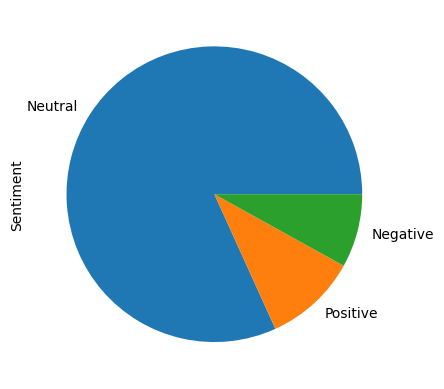

In [23]:
df['Sentiment'].value_counts().plot(kind = 'pie')

# Hidden Emotions

In [24]:
df.groupby('user').mean()

,Score,hour,month,year
user,,,,
D C,0.002503,14.747366,6.483923,2022.283977
Dannie3,0.001227,15.090802,5.983250,2022.194534
E E,0.013677,15.740484,6.076125,2022.107266
E I P,0.004755,14.688073,5.936138,2022.149248
N B,0.007635,14.488667,5.896386,2022.133661
O A,0.014579,14.468665,5.945605,2022.164677
O J,0.010808,14.173021,6.010264,2022.272727
R P,0.005741,14.349451,6.068446,2022.062794
Sa Ga,-0.004087,15.565568,4.449899,2022.088769


In [25]:
year_month = df.groupby(['user','month', 'year']).mean().reset_index()
year_month

,user,month,year,Score,hour
0,D C,1,2022,0.031202,12.812500
1,D C,1,2023,-0.000869,14.625000
2,D C,2,2022,0.011700,15.693333
3,D C,2,2023,-0.009902,13.375375
4,D C,3,2022,-0.006600,15.666667
...,...,...,...,...,...
211,Sh@eks,7,2022,0.000000,7.000000
212,Sh@eks,8,2022,0.000000,13.857143
213,Sh@eks,10,2022,-0.048571,20.571429
214,Sh@eks,11,2022,0.000000,12.666667


In [26]:
df['user'].unique()

array(['N B', 'O A', 'Sa Ga', 'E I P', 'Dannie3', 'R P', 'O J', 'Sh@eks',
       'E E', 'D C'], dtype=object)

In [27]:
streetKing = year_month[year_month['user'] == 'N B']['Score'].values
backBreaker = year_month[year_month['user'] == 'O A']['Score'].values
mrVulnerable = year_month[year_month['user'] == 'Sa Ga']['Score'].values
blackSmoke = year_month[year_month['user'] == 'E I P']['Score'].values
dannie3 = year_month[year_month['user'] == 'Dannie3']['Score'].values
certifiedLoverBoy = year_month[year_month['user'] == 'R P']['Score'].values
tipStar = year_month[year_month['user'] == 'O J']['Score'].values
shaeks = year_month[year_month['user'] == 'Shaeks']['Score'].values
silentAssassin = year_month[year_month['user'] == 'E E']['Score'].values
uncleWaffles = year_month[year_month['user'] == 'D C']['Score'].values

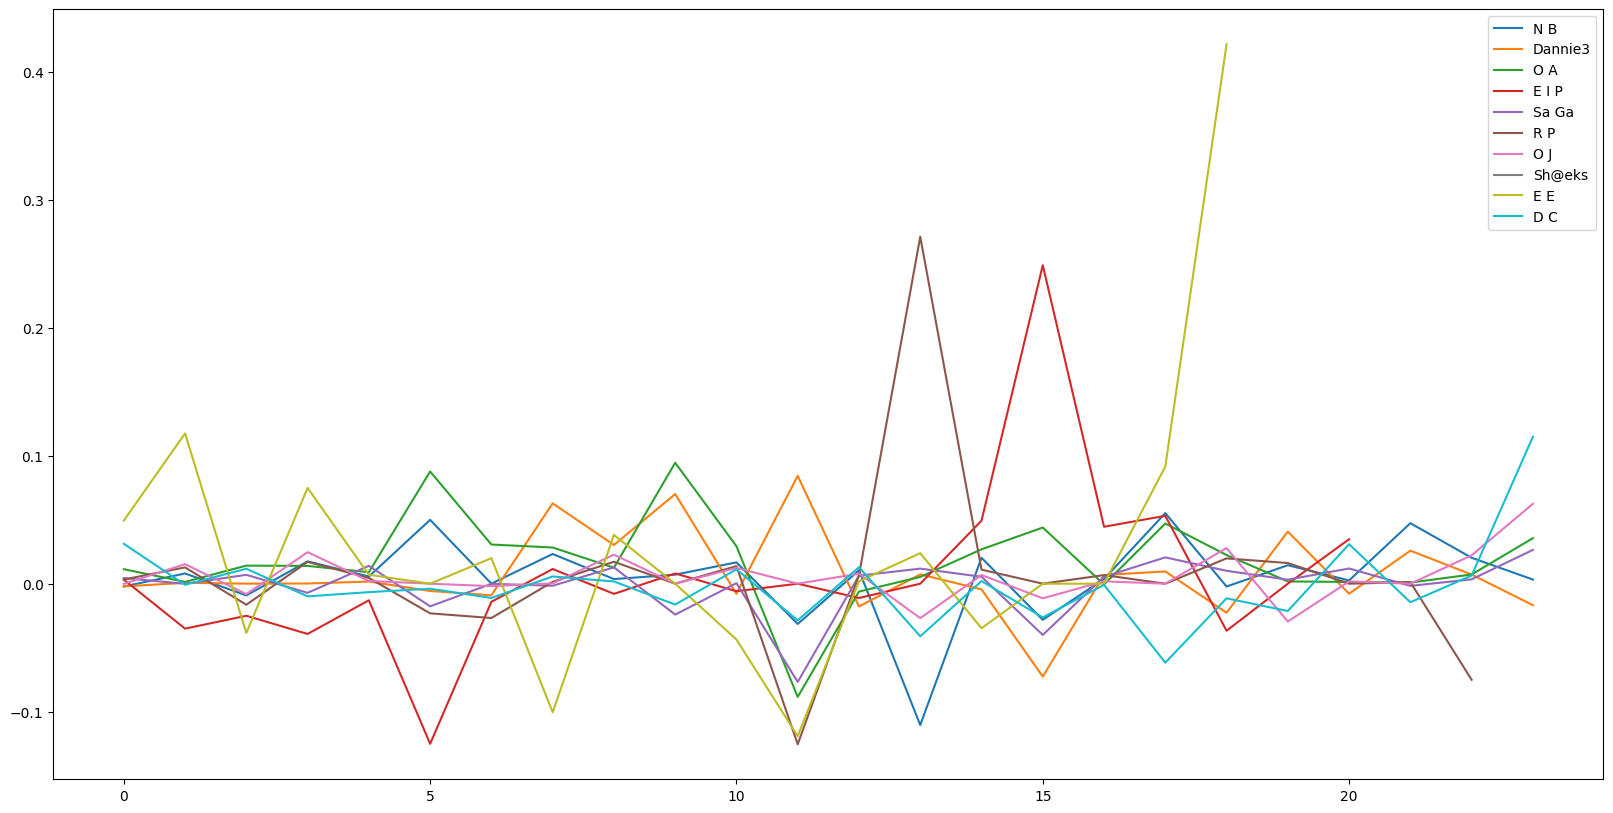

In [28]:
plt.figure(figsize = (20,10))
plt.plot(streetKing, label='N B')
plt.plot(dannie3, label='Dannie3')
plt.plot(backBreaker, label='O A')
plt.plot(mrVulnerable, label='E I P')
plt.plot(blackSmoke, label='Sa Ga')
plt.plot(certifiedLoverBoy, label='R P')
plt.plot(tipStar, label='O J')
plt.plot(shaeks, label='Sh@eks')
plt.plot(silentAssassin, label='E E')
plt.plot(uncleWaffles, label='D C')
plt.legend()

In [29]:
# year_month.to_csv('Average Sentiment Score.csv')